In [1]:
# import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [ ]:
# Divide the dataset in independent and dependent feature

In [4]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [5]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Feature Engineering

In [7]:
geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [8]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [9]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [ ]:
# Concatenate these variable with dataframe

In [10]:
x = x.drop(['Geography','Gender'],axis =1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
x = pd.concat([x,geography,gender], axis =1)  

In [12]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [56]:
# Spliting the dataset in training and testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)

In [15]:
x_train.shape

(8000, 11)

In [16]:
x_test.shape

(2000, 11)

In [17]:
y_train.shape

(8000,)

In [18]:
y_test.shape

(2000,)

In [ ]:
# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
# Model Building

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [ ]:
# Initialize ann

In [24]:
ann =Sequential()


In [ ]:
# Adding first input layer

In [25]:
ann.add(Dense(units =11,activation ='relu'))

In [ ]:
# Adding first hidden layer

In [26]:
ann.add(Dense(units=7,activation ='relu'))

In [ ]:
# Adding second hidden layer

In [27]:
ann.add(Dense(units=6, activation ='relu'))

In [ ]:
# Adding output layer

In [28]:
ann.add(Dense(1,activation ='sigmoid'))

In [31]:
ann.compile(loss ='binary_crossentropy',optimizer =opt,metrics =['accuracy'])

In [59]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate =0.001)

In [ ]:
# Early Stopping

In [32]:
early_stopping =tensorflow.keras.callbacks.EarlyStopping(monitor= "val_loss",
                                         min_delta=0.0001,
                                         patience=20,
                                         verbose =1,
                                         mode ='auto',
                                         baseline =None,
                                         restore_best_weights =False,)

In [ ]:
# Training the model

In [33]:
model = ann.fit(x_train,y_train,validation_split =0.33,batch_size =10,epochs=50,callbacks =early_stopping)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7834 - loss: 0.4665 - val_accuracy: 0.8376 - val_loss: 0.3852
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8474 - loss: 0.3672 - val_accuracy: 0.8379 - val_loss: 0.3901
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8430 - loss: 0.3673 - val_accuracy: 0.8406 - val_loss: 0.3743
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8545 - loss: 0.3373 - val_accuracy: 0.8478 - val_loss: 0.3649
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8600 - loss: 0.3430 - val_accuracy: 0.8501 - val_loss: 0.3621
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8703 - loss: 0.3277 - val_accuracy: 0.8482 - val_loss: 0.3664
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8518 - loss: 0.3482 - val_accuracy: 0.8501 - val_loss: 0.3707
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8566 - loss: 0.3490 - val_accuracy: 0.

In [34]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# Summarize the accuracy_plot

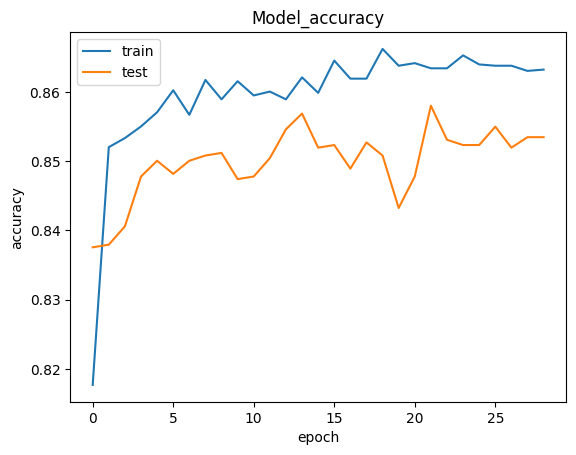

In [35]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [ ]:
# Summarize the loss plot

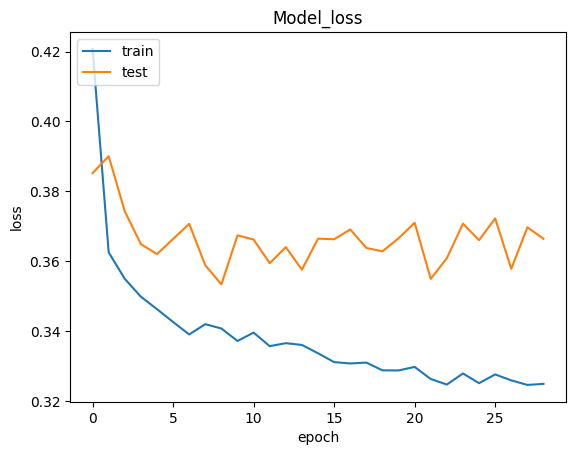

In [36]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [ ]:
# Make prediction

In [37]:
y_pred = ann.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.3629634 ],
       [0.29303008],
       [0.0879844 ],
       ...,
       [0.1578267 ],
       [0.1149007 ],
       [0.24287781]], dtype=float32)

In [44]:
y_pred_binary = np.where(y_pred>=0.5,1,0)
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [49]:
confusion_matrix(y_pred_binary,y_test)

array([[1527,  216],
       [  68,  189]], dtype=int64)

In [50]:
accuracy_score(y_pred_binary,y_test)

0.858

In [54]:
cr = classification_report(y_pred_binary,y_test)


In [53]:
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1743
           1       0.47      0.74      0.57       257

    accuracy                           0.86      2000
   macro avg       0.71      0.81      0.74      2000
weighted avg       0.89      0.86      0.87      2000



In [55]:
ann.get_weights()

[array([[-4.39775556e-01, -3.54802579e-01,  2.16941331e-02,
          5.70100188e-01,  4.04834263e-02, -7.43937418e-02,
          1.93121135e-01,  8.47039297e-02,  1.81103006e-01,
          1.88279659e-01, -1.16194580e-02],
        [ 1.46758199e+00,  6.61555111e-01,  2.20825481e+00,
         -9.04531300e-01, -6.61304116e-01,  2.13903713e+00,
         -1.74056900e+00, -1.25381804e+00,  8.07543576e-01,
         -2.86723018e+00,  2.34891176e-01],
        [-1.24102664e+00,  7.47068524e-01,  6.90306649e-02,
          8.21641266e-01,  2.16294467e-01, -3.68982106e-01,
          1.10374749e-01,  3.77325356e-01,  4.46619570e-01,
         -6.17041349e-01,  5.67612089e-02],
        [-2.19187170e-01, -3.01408863e+00, -1.67692423e-01,
         -2.37987924e+00, -8.01497400e-01,  4.75284100e-01,
         -5.68285644e-01, -1.28543711e+00,  9.36822742e-02,
         -8.34436774e-01, -3.01300406e+00],
        [ 1.54955029e-01, -8.06148350e-01, -1.35334551e-01,
         -2.60915041e-01, -8.44597459e-01, -